In [39]:
import numpy as np
import os, json, cv2, random
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import copy
import os
import matplotlib
matplotlib.use('tkagg')
import matplotlib.pyplot as plt
import albumentations as A
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [40]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import copy
#from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.structures import BoxMode
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #fixes matplotlib issue

In [41]:
def cv2_imshow(im):
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGBA)
    plt.figure(), plt.imshow(im), plt.axis('off');
    return im

In [42]:
# processes dictionary of data
def SplitDatadir(data_dict,img_ids):
    newdata_dict=copy.deepcopy(data_dict) #.copy()
    print("start, total number of images: ",len(newdata_dict["images"]),"total number of annotations:" , len(newdata_dict["annotations"]))
    #newdata_dict["images"]={}
    #newdata_dict["annotations"]={}
    
    newdata_dict["images"]=list(img for img in data_dict["images"] if img["id"] in img_ids)
    newdata_dict["annotations"]=list(ann for ann in data_dict["annotations"] if ann['image_id'] in img_ids)

    print("finish, total number of images: ",len(newdata_dict["images"]), "total number of annotations:" ,len(newdata_dict["annotations"]))
    return newdata_dict

In [43]:
import os, shutil, pathlib, fnmatch

def move_dir(src: str, dst: str, filenames: str, pattern: str = '*'):
    if not os.path.isdir(dst):
        pathlib.Path(dst).mkdir(parents=True, exist_ok=True)
    for f in fnmatch.filter(filenames, pattern):
        if os.path.isfile(src+f):
            shutil.move(os.path.join(src, f), os.path.join(dst, f))

## Load data  into json

In [326]:
dataset_path = './train/'
anns_file_path = dataset_path + '_annotations.coco.json' # filename

unofficial_dataset_path = './TACO/modified_unofficial/train/'
unofficial_anns_file_path = unofficial_dataset_path + '_annotations.coco.json' # filename

with open(anns_file_path, 'r') as f:
    dataset = json.loads(f.read())

# 3 main metadata in coco dataset
categories = dataset['categories'] # list of categories
anns = dataset['annotations'] # list of annotations
imgs = dataset['images']# list of images

In [646]:
# get random background
for t in range(250):
    ran_img = np.random.choice(imgs)
    file_n = ran_img['file_name']
    ran_img = cv2.imread(dataset_path+ran_img['file_name'])
    #cv2_imshow(ran_img)
    save_path = './bg/'
    #ran_img = cv2.cvtColor(ran_img, cv2.COLOR_BGR2RGB)
    cv2.imwrite(save_path + file_n, ran_img)

In [472]:
img_df=pd.DataFrame(imgs)
ang_df=pd.DataFrame(anns)
cat_df=pd.DataFrame(categories)
#cat_df = cat_df.iloc[1:]
print('Number of super categories:',len(cat_df.supercategory.unique()))
print('Number of categories:',len(cat_df.name.unique()))
print('Number of annotations:', len(ang_df))
print('Number of images:', len(img_df))

Number of super categories: 2
Number of categories: 18
Number of annotations: 5
Number of images: 1500


In [328]:
categories

[{'id': 0, 'name': 'trash', 'supercategory': 'none'},
 {'id': 1, 'name': 'Aluminium', 'supercategory': 'trash'},
 {'id': 2, 'name': 'Cardboard', 'supercategory': 'trash'},
 {'id': 3, 'name': 'Carton', 'supercategory': 'trash'},
 {'id': 4, 'name': 'Glass', 'supercategory': 'trash'},
 {'id': 5, 'name': 'HDPE plastic', 'supercategory': 'trash'},
 {'id': 6, 'name': 'LDPE plastic', 'supercategory': 'trash'},
 {'id': 7, 'name': 'Other metal', 'supercategory': 'trash'},
 {'id': 8, 'name': 'Other plastic', 'supercategory': 'trash'},
 {'id': 9, 'name': 'PET plastic', 'supercategory': 'trash'},
 {'id': 10, 'name': 'PP plastic', 'supercategory': 'trash'},
 {'id': 11, 'name': 'PS plastic', 'supercategory': 'trash'},
 {'id': 12, 'name': 'PVC plastic', 'supercategory': 'trash'},
 {'id': 13, 'name': 'Paper', 'supercategory': 'trash'},
 {'id': 14, 'name': 'Plastic bag', 'supercategory': 'trash'},
 {'id': 15, 'name': 'Plastic packaging', 'supercategory': 'trash'},
 {'id': 16, 'name': 'Snack packaging',

In [329]:
img_df

,id,license,file_name,height,width,date_captured
0,0,1,000084_jpg.rf.adb485b2d232aa6fafbcc5a8088c9819.jpg,4000,1824,2023-01-24T09:23:52+00:00
1,1,1,000032_jpg.rf.acaec120416915919c09ed31b08ad629.jpg,3024,4032,2023-01-24T09:23:52+00:00
2,2,1,000057_jpg.rf.acd0fc6230ef2db1596380590336a5e7.jpg,3024,4032,2023-01-24T09:23:52+00:00
3,3,1,000085_jpg.rf.ad22dac9f9cb2abd125001fc7e0b191e.jpg,4032,3024,2023-01-24T09:23:52+00:00
4,4,1,000004_jpg.rf.ad3272c1aa5bee6863d731a9c34488c6.jpg,3120,4160,2023-01-24T09:23:52+00:00
5,5,1,000069_JPG.rf.ad4701e781f4212237b41488a21e816b.jpg,2448,3264,2023-01-24T09:23:52+00:00
6,6,1,000018_JPG.rf.ad4f2c4adbe6a2c0e62de6ee9b44f8f1.jpg,2448,3264,2023-01-24T09:23:52+00:00
7,7,1,000105_JPG.rf.adbe678cabad1c5c462bec99dbb7048b.jpg,3264,2448,2023-01-24T09:23:52+00:00
8,8,1,000023_jpg.rf.ade23e36d426f22b476cd38ea17f40ef.jpg,2048,1536,2023-01-24T09:23:52+00:00
9,9,1,000006_JPG.rf.ae1833d538e9a7d63121b4c6a0c82477.jpg,3264,2448,2023-01-24T09:23:52+00:00


In [330]:
# eliminate duplicates
val,counts=np.unique(ang_df.id,return_counts=True)
val[counts>1] #array([ 309, 4040])
ang_df=ang_df[~ang_df.id.duplicated(keep="first")]

# create categories column
ang_df["categories"]=ang_df["category_id"].apply(lambda value: categories[value]["name"] )

In [10]:
ang_df

,id,image_id,category_id,bbox,area,segmentation,iscrowd,categories
0,0,0,4,"[772, 329, 930, 833]",774690,"[[1561, 1162, 1603, 1139, 1652, 1087, 1678, 1058, 1702, 1015, 1682, 996, 1678, 981, 1658, 974, 1651, 956, 1637, 959, 1609, 935, 1573, 882, 1554, 839, 1539, 783, 1538, 746, 1505, 713, 1452, 675, 1379, 619, 1296, 556, 1205, 478, 1102, 399, 1054, 356, 1025, 339, 986, 329, 946, 332, 894, 357, 853, 399, 813, 444, 787, 492, 775, 530, 772, 559, 788, 599, 810, 640, 855, 679, 913, 731, 958, 764, 1010, 811, 1074, 874, 1117, 906, 1165, 948, 1198, 980, 1231, 1008, 1270, 1044, 1305, 1059, 1353, 1054, 1395, 1058, 1428, 1068, 1459, 1080, 1494, 1108, 1501, 1118, ...]]",0,Glass
1,1,1,8,"[906, 1706, 930, 890]",827700,"[[932, 2018, 906, 2180, 978, 2349, 1095, 2453, 1238, 2551, 1394, 2596, 1543, 2564, 1673, 2505, 1671.192, 2500.311, 1676.023, 2500.93, 1803, 2330, 1836, 2050, 1732, 1875, 1576, 1751, 1433, 1706, 1290, 1725, 1166, 1777, 1049, 1849, 932, 2018]]",0,Other plastic
2,2,2,5,"[1499, 1254, 1229, 535]",657515,"[[1550, 1254, 1531, 1329, 1525, 1392, 1512, 1468, 1499, 1544, 1550, 1581, 1638, 1594, 1732, 1613, 1808, 1632, 1903, 1676, 2010, 1701, 2136, 1732, 2262, 1745, 2419, 1777, 2558, 1783, 2627, 1789, 2671, 1732, 2646, 1663, 2715, 1606, 2696, 1537, 2728, 1449, 2690, 1399, 2589, 1373, 2476, 1354, 2337, 1336, 2230, 1310, 2155, 1304, 2060, 1304, 1966, 1304, 1821, 1298, 1732, 1279, 1632, 1254]]",0,HDPE plastic
3,3,3,10,"[1632, 57, 1707, 2243]",3828801,"[[1633.065, 2295.114, 1632, 2300, 2457, 2255, 2456.175, 2250.062, 2457.211, 2249.986, 2455.35, 2245.123, 2457.422, 2244.973, 2454.524, 2240.185, 2457.633, 2239.959, 2453.699, 2235.247, 2457.844, 2234.946, 2488, 1518, 2495, 750, 2375, 687, 2375.227, 680.318, 2526, 724, 2501, 995, 2904, 1632, 3339, 1121, 2558, 57, 2432, 69, 2136, 334, 2196.239, 694.496, 2199.114, 698.076, 2197.064, 699.434, 2194.089, 698.392, 1978, 712, 1633.065, 2295.114]]",0,PP plastic
4,4,4,4,"[904, 906, 531, 505]",268155,"[[904, 1264, 1262, 906, 1435, 1085, 1371, 1286, 990, 1411]]",0,Glass
...,...,...,...,...,...,...,...,...
6650,6650,3720,8,"[586, 1101, 230, 214]",49220,"[[650, 1277, 726, 1315, 790, 1306, 816, 1219, 768, 1168, 810, 1142, 768, 1104, 698, 1101, 637, 1104, 602, 1126, 586, 1171, 595, 1216]]",0,Other plastic
6651,6651,3721,13,"[1288, 681, 493, 338]",166634,"[[1375, 681, 1781, 731, 1719, 1019, 1288, 1006]]",0,Paper
6652,6652,3721,4,"[1162, 1688, 426, 581]",247506,"[[1162, 1775, 1456, 1688, 1588, 2150, 1206, 2269]]",0,Glass
6653,6653,3722,7,"[16, 1411, 3005, 738]",2217690,"[[22, 1531, 236, 1607, 469, 1663, 495, 1764, 621, 1758, 614, 1689, 1017, 1764, 1282, 1821, 1591, 1878, 1969, 1934, 2347, 1985, 2523, 2010, 2517, 2149, 2624, 2149, 2624, 2016, 2996, 2067, 3021, 1796, 2391, 1745, 1647, 1663, 1036, 1575, 545, 1519, 255, 1468, 16, 1411]]",0,Other metal


In [11]:
# image id for image filename
file_name = '000020_JPG.rf.3fa481c85ebf083e17b8f0de5a7330d3.jpg'
img_df.loc[img_df['file_name'] == file_name]

,id,license,file_name,height,width,date_captured


## Move instances from unofficial to official

In [91]:
class_name = 'LDPE plastic'
move_class = ang_df.loc[ang_df['categories'] == class_name]

In [92]:
move_class

,id,image_id,category_id,bbox,area,segmentation,iscrowd,categories
18,18,16,6,"[178, 1294, 198, 154]",30492,"[[178, 1381, 282, 1294, 376, 1356, 246, 1448]]",0,LDPE plastic
19,19,16,6,"[745, 519, 246, 107]",26322,"[[745, 574, 803, 537, 846, 546, 887, 519, 991, 564, 939, 605, 855, 626]]",0,LDPE plastic
40,40,27,6,"[820, 2081, 952, 686]",653072,"[[1300, 2081, 1338, 2103, 1348, 2131, 1374, 2158, 1394, 2195, 1418, 2261, 1400, 2309, 1370, 2331, 1396, 2331, 1408, 2342, 1440, 2366, 1460, 2400, 1462, 2431, 1482, 2431, 1500, 2427, 1532, 2429, 1554, 2436, 1556, 2446, 1582, 2458, 1592, 2478, 1614, 2497, 1638, 2507, 1642, 2527, 1654, 2514, 1670, 2511, 1686, 2499, 1696, 2501, 1730, 2474, 1752, 2479, 1760, 2471, 1772, 2487, 1740, 2507, 1770, 2536, 1766, 2573, 1736, 2606, 1710, 2677, 1700, 2681, 1678, 2704, 1650, 2700, 1632, 2678, 1628, 2662, 1616, 2650, 1596, 2646, 1560, 2660, 1530, 2662, 1514, 2672, 1496, 2671, 1486, 2652, 1472, 2655, 1432, 2667, ...]]",0,LDPE plastic
49,49,33,6,"[139, 1418, 1341, 1927]",2584107,"[[1361, 1499, 1436, 1764, 1424, 1840, 1480, 1978, 1336, 2822, 1096, 2930, 1021, 3232, 850, 3257, 819, 3345, 668, 3270, 630, 3194, 523, 3024, 176, 2986, 139, 2797, 265, 2747, 277, 2526, 365, 2501, 517, 2073, 712, 1953, 706, 1846, 850, 1796, 907, 1688, 951, 1499, 1033, 1480, 1046, 1418, 1203, 1430, 1254, 1493]]",0,LDPE plastic
68,68,38,6,"[492, 3414, 144, 328]",47232,"[[631, 3662, 631, 3636, 636, 3618, 625, 3628, 611, 3628, 599, 3636, 589, 3630, 576, 3644, 565, 3640, 579, 3618, 583, 3606, 572, 3604, 573, 3592, 588, 3584, 600, 3572, 611, 3586, 617, 3570, 625, 3556, 628, 3544, 617, 3534, 622, 3514, 600, 3522, 586, 3532, 584, 3514, 615, 3494, 598, 3490, 601, 3476, 622, 3476, 632, 3458, 629, 3434, 581, 3414, 578, 3438, 569, 3430, 555, 3434, 551, 3448, 556, 3460, 544, 3490, 530, 3518, 529, 3528, 517, 3550, 501, 3592, 499, 3612, 502, 3628, 492, 3650, 496, 3668, 494, 3690, 513, 3700, 527, 3712, 551, 3720, 573, 3732, ...]]",0,LDPE plastic
...,...,...,...,...,...,...,...,...
6605,6605,3693,6,"[2216, 1080, 325, 110]",35750,"[[2221, 1190, 2216, 1167, 2494, 1096, 2531, 1080, 2541, 1101, 2275, 1182]]",0,LDPE plastic
6612,6612,3698,6,"[1339, 2525, 336, 214]",71904,"[[1361, 2557, 1460, 2553, 1487, 2525, 1485, 2553, 1642, 2581, 1631, 2648, 1675, 2705, 1621, 2739, 1495, 2702, 1427, 2611, 1379, 2586, 1349, 2587, 1341, 2604, 1339, 2577]]",0,LDPE plastic
6629,6629,3710,6,"[2995, 960, 1147, 994]",1140118,"[[2995, 1821, 3020, 1617, 3127, 1324, 3195, 1170, 3326, 960, 3637, 1062, 3900, 1173, 4142, 1312, 4082, 1371, 3850, 1562, 3760, 1632, 3717, 1761, 3641, 1794, 3454, 1892, 3510, 1954, 3220, 1954, 3117, 1913, 3005, 1834]]",0,LDPE plastic
6638,6638,3717,6,"[386, 1537, 1091, 1407]",1535037,"[[424, 1537, 1098, 1771, 1439, 2086, 1420, 2522, 1477, 2831, 1458, 2944, 1357, 2818, 1351, 2496, 1401, 2206, 1168, 1935, 607, 1682, 386, 1613]]",0,LDPE plastic


In [93]:
file_list = [] 
range_num = 100
counter = 0
for i in move_class.index:
    file_list.append(img_df.loc[img_df['id'] == move_class['image_id'][i]]['file_name'].to_string(index=False))
    counter+=1
    if counter >= range_num:
        break

In [94]:
len(file_list)

100

In [95]:
# move files from unofficial to new file
src_file = './TACO/modified_unofficial/train/'
dest_file = './LDPE_plastic_file/'
move_dir(src_file, dest_file, file_list)
#print(os.listdir(file_list))

## Split dataset into training and validation

In [88]:
# Collective dataset of dictionaries of each TACO metadata
cocodata={"images":img_df[["id","width","height","file_name"]].to_dict("records"),#Cut index 
         "annotations":ang_df[['id', 'image_id', 'category_id', 'segmentation', 'area', 'bbox',
       'iscrowd']].to_dict("records"),
          "categories":categories, "info":dataset["info"]}

In [34]:
#Save datadata as json
save_name="TACO_annotations.json"
json.dump(cocodata,open(save_name,"w"))


#Train eval split
img_id=list(range(1,len(cocodata["images"])+1))
np.random.seed=42
import random


#Split data set by 80% train, 20% eval
# Get the random image ids from the dataset for both train and validation set
train_id=random.sample(img_id,int((len(img_id))*0.8))
val_id=list([id for id in img_id if id not in train_id])
print("size of training data: ", len(train_id),", size of validation data: " , len(val_id))

# process and save training and validation data
train_dataset=SplitDatadir(cocodata,train_id)
json.dump(train_dataset,open(save_name.replace(".","_train."),"w"))
val_dataset=SplitDatadir(cocodata,val_id)
json.dump(val_dataset,open(save_name.replace(".","_val."),"w"))

size of training data:  1199 , size of validation data:  300
start, total number of images:  1499 total number of annotations: 3542
finish, total number of images:  1198 total number of annotations: 2780
start, total number of images:  1499 total number of annotations: 3542
finish, total number of images:  300 total number of annotations: 760


## Data augmentation

In [35]:
from copy_paste_aug.copy_paste import CopyPaste
from copy_paste_aug.coco import CocoDetectionCP
from copy_paste_aug.visualize import display_instances
from albumentations.pytorch.transforms import ToTensorV2

In [36]:
transform =  A.Compose([
    CopyPaste(blend=True, sigma=1, pct_objects_paste=0.5, p=1)
    ], bbox_params=A.BboxParams(format="coco")
)


In [37]:
# pick one background
im1 = cv2.imread(dataset_path + imgs[1]['file_name'])

In [38]:
cv2_imshow(im1)

array([[[ 66,  76,  65, 255],
        [ 66,  76,  65, 255],
        [ 65,  75,  64, 255],
        ...,
        [137, 127,  68, 255],
        [125, 112,  57, 255],
        [111,  98,  43, 255]],

       [[ 67,  77,  66, 255],
        [ 67,  77,  66, 255],
        [ 67,  77,  66, 255],
        ...,
        [138, 128,  69, 255],
        [127, 114,  59, 255],
        [113, 100,  45, 255]],

       [[ 68,  78,  67, 255],
        [ 68,  78,  67, 255],
        [ 68,  78,  67, 255],
        ...,
        [140, 130,  71, 255],
        [129, 116,  61, 255],
        [117, 104,  49, 255]],

       ...,

       [[ 68,  80,  76, 255],
        [ 67,  79,  75, 255],
        [ 66,  78,  74, 255],
        ...,
        [ 12,  15,   8, 255],
        [ 12,  15,   8, 255],
        [ 12,  15,   8, 255]],

       [[ 69,  81,  77, 255],
        [ 68,  80,  76, 255],
        [ 67,  79,  75, 255],
        ...,
        [ 12,  15,   8, 255],
        [ 12,  15,   8, 255],
        [ 12,  15,   8, 255]],

       [[ 69

In [39]:
datas = CocoDetectionCP(
    root='./train/',
    annFile='./train/_annotations.coco.json',
    transforms=transform
)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


In [40]:
datas[0]

{'image': array([[[200, 203, 222],
         [199, 202, 221],
         [199, 202, 221],
         ...,
         [211, 213, 226],
         [211, 213, 226],
         [212, 214, 227]],
 
        [[200, 203, 222],
         [199, 202, 221],
         [199, 202, 221],
         ...,
         [211, 213, 226],
         [211, 213, 226],
         [212, 214, 227]],
 
        [[199, 202, 221],
         [199, 202, 221],
         [198, 201, 220],
         ...,
         [211, 213, 226],
         [211, 213, 226],
         [212, 214, 227]],
 
        ...,
 
        [[162, 169, 177],
         [162, 169, 177],
         [163, 170, 178],
         ...,
         [159, 162, 167],
         [157, 160, 165],
         [155, 158, 163]],
 
        [[161, 168, 176],
         [161, 168, 176],
         [163, 170, 178],
         ...,
         [155, 160, 164],
         [155, 160, 164],
         [155, 160, 164]],
 
        [[160, 167, 175],
         [161, 168, 176],
         [162, 169, 177],
         ...,
         [153, 158,

In [190]:
f, ax = plt.subplots(1, 2, figsize=(16, 16))

index = random.randint(0, len(datas))
img_data = datas[index]
image = img_data['image']
masks = img_data['masks']
bboxes = img_data['bboxes']

empty = np.array([])
display_instances(image, empty, empty, empty, empty, show_mask=False, show_bbox=False, ax=ax[0])

if len(bboxes) > 0:
    boxes = np.stack([b[:4] for b in bboxes], axis=0)
    box_classes = np.array([b[-2] for b in bboxes])
    mask_indices = np.array([b[-1] for b in bboxes])
    show_masks = np.stack(masks, axis=-1)[..., mask_indices]
    class_names = {k: datas.coco.cats[k]['name'] for k in datas.coco.cats.keys()}
    display_instances(image, boxes, show_masks, box_classes, class_names, show_bbox=True, ax=ax[1])
else:
    display_instances(image, empty, empty, empty, empty, show_mask=False, show_bbox=False, ax=ax[1])

plt.show()
print(img_data)

{'image': array([[[123, 177, 119],
        [117, 171, 113],
        [110, 164, 106],
        ...,
        [ 17,  35,  11],
        [ 16,  34,  10],
        [ 15,  33,   9]],

       [[120, 174, 116],
        [116, 170, 112],
        [112, 166, 108],
        ...,
        [ 17,  35,  11],
        [ 19,  37,  13],
        [ 20,  38,  14]],

       [[114, 168, 110],
        [113, 167, 109],
        [113, 167, 109],
        ...,
        [ 16,  34,  10],
        [ 22,  40,  16],
        [ 27,  45,  21]],

       ...,

       [[194, 189, 183],
        [201, 196, 190],
        [196, 191, 185],
        ...,
        [108, 108, 110],
        [102, 102, 104],
        [ 98,  98, 100]],

       [[215, 210, 204],
        [223, 218, 212],
        [219, 214, 208],
        ...,
        [ 96,  96,  98],
        [ 96,  96,  98],
        [ 99,  99, 101]],

       [[251, 246, 240],
        [250, 245, 239],
        [231, 226, 220],
        ...,
        [ 89,  89,  91],
        [ 95,  95,  97],
        [105, 

## Display ground truth

In [147]:
dataset_path = './train/'
anns_file_path = dataset_path + '_annotations.coco.json' # filename

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
Number of instances:  2


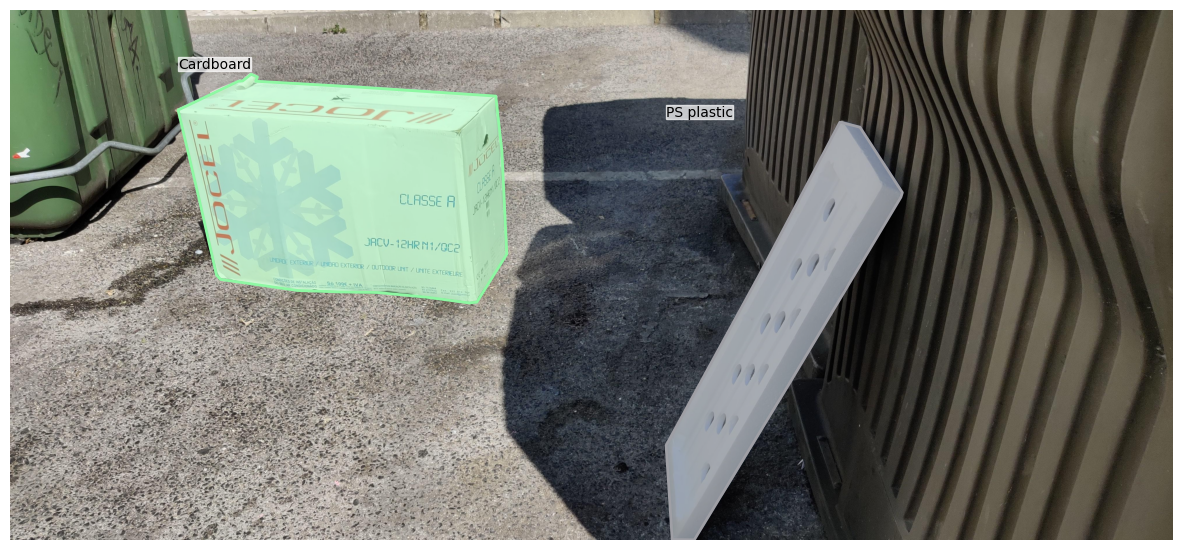

In [304]:
# Displays ground truth
%matplotlib inline
from detectron2.utils.visualizer import Visualizer
from pycocotools.coco import COCO

coco=COCO(anns_file_path) #anns_file_path (change annotations file path)

catIds = coco.getCatIds()
imgIds = coco.getImgIds()
imgIds = coco.getImgIds(imgIds = imgIds[1469])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I = plt.imread(dataset_path+img['file_name'])


plt.figure(figsize=(15,15))
plt.imshow(I)
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
print("Number of instances: ", len(anns))

# show labels to text
for a in range(len(anns)):
    plt.text(anns[a]["bbox"][0], anns[a]["bbox"][1]-20 , cat_df.at[anns[a]["category_id"], "name"], #supercategory
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='white', boxstyle='square,pad=0.0'),
            fontdict=dict(fontsize=10))
    
plt.axis('off')
#plt.show()
coco.showAnns(anns, draw_bbox=False) # if bounding box will be shown, set draw_bbox=True

## Batch remove background on specific class

In [402]:
temp_df = ang_df.loc[ang_df["categories"] == 'Plastic bag']
temp_df = temp_df.iloc[54:200]
temp_df

,id,image_id,category_id,bbox,area,segmentation,iscrowd,categories
3234,3234,1363,14,"[1558, 807, 244, 80]",19520.0,"[[1570, 863, 1558, 852, 1560, 834, 1580, 816, 1608, 811, 1640, 807, 1677, 811, 1710, 817, 1736, 819, 1755, 827, 1769, 830, 1797, 837, 1802, 845, 1784, 856, 1758, 861, 1721, 867, 1685, 876, 1658, 887, 1630, 879, 1602, 878, 1581, 870, 1570, 863]]",0,Plastic bag
3238,3238,1367,14,"[2257, 789, 132, 112]",14784.0,"[[2257, 811, 2283, 805, 2325, 795, 2382, 789, 2345, 824, 2370, 811, 2376, 833, 2388, 856, 2389, 901, 2347, 900, 2320, 878, 2304, 858, 2292, 864, 2283, 848, 2267, 858, 2257, 847]]",0,Plastic bag
3272,3272,1382,14,"[124, 735, 392, 550]",215600.0,"[[315, 735, 330, 759, 337, 762, 353, 775, 372, 806, 408, 830, 450, 859, 496, 903, 509, 948, 516, 1000, 515, 1029, 505, 1087, 494, 1114, 493, 1144, 479, 1175, 460, 1200, 421, 1220, 369, 1234, 323, 1245, 295, 1244, 279, 1241, 269, 1232, 239, 1241, 214, 1244, 204, 1246, 165, 1285, 158, 1282, 153, 1264, 142, 1229, 145, 1174, 140, 1142, 137, 1133, 124, 1099, 129, 1068, 125, 1048, 131, 1029, 175, 912, 182, 880, 204, 848, 218, 829, 230, 809, 248, 792, 256, 754, 264, 739, 315, 735]]",0,Plastic bag
3286,3286,1389,14,"[437, 1287, 576, 701]",403776.0,"[[714, 1341, 754, 1331, 754, 1323, 794, 1301, 817, 1289, 830, 1287, 850, 1297, 871, 1308, 891, 1317, 907, 1334, 924, 1354, 937, 1372, 932, 1390, 967, 1386, 976, 1387, 990, 1420, 990, 1431, 983, 1446, 998, 1449, 997, 1466, 1008, 1503, 1012, 1552, 1013, 1575, 989, 1627, 985, 1675, 968, 1696, 953, 1726, 940, 1755, 945, 1790, 943, 1815, 935, 1854, 922, 1881, 900, 1908, 863, 1936, 814, 1965, 777, 1982, 759, 1988, 733, 1985, 721, 1981, 670, 1985, 650, 1979, 593, 1983, 583, 1965, 550, 1976, 536, 1965, 505, 1916, 480, 1897, 452, 1861, 439, 1834, 437, 1816, ...]]",0,Plastic bag
3287,3287,1390,14,"[1435, 1622, 142, 28]",3976.0,"[[1435, 1642, 1441, 1633, 1474, 1637, 1487, 1629, 1499, 1631, 1513, 1622, 1534, 1625, 1566, 1626, 1577, 1642, 1543, 1646, 1512, 1649, 1486, 1650, 1458, 1648]]",0,Plastic bag
3380,3380,1434,14,"[620, 1033, 1749, 2161]",3779589.0,"[[881, 1323, 828, 1416, 789, 1502, 762, 1586, 745, 1666, 732, 1744, 733, 1816, 726, 1878, 710, 1943, 688, 2040, 671, 2124, 654, 2192, 642, 2262, 627, 2357, 620, 2477, 623, 2551, 631, 2605, 658, 2641, 675, 2680, 705, 2713, 727, 2740, 756, 2784, 786, 2808, 801, 2863, 795, 2907, 815, 2922, 833, 2939, 851, 2922, 879, 2919, 935, 2916, 935, 2904, 943, 2902, 952, 2912, 975, 2893, 1006, 2850, 1012, 2831, 1005, 2813, 1006, 2798, 1008, 2768, 1023, 2712, 1033, 2656, 1035, 2612, 1046, 2585, 1068, 2590, 1088, 2595, 1120, 2578, 1154, 2557, 1206, 2565, 1261, 2579, 1381, 2606, ...]]",0,Plastic bag
3457,3457,1475,14,"[512, 1449, 1390, 1012]",1406680.0,"[[1352, 2461, 1529, 2460, 1728, 2457, 1760, 2454, 1761, 2430, 1761, 2421, 1815, 2325, 1869, 2216, 1865, 2050, 1868, 2020, 1902, 1968, 1899, 1949, 1901, 1929, 1859, 1797, 1823, 1720, 1761, 1624, 1738, 1593, 1689, 1544, 1644, 1492, 1624, 1477, 1578, 1449, 1567, 1457, 1546, 1483, 1502, 1534, 1484, 1555, 1483, 1559, 1427, 1649, 1409, 1676, 1381, 1713, 1357, 1751, 1317, 1755, 1298, 1759, 1274, 1765, 1252, 1761, 1226, 1757, 1171, 1747, 1057, 1723, 986, 1738, 864, 1760, 860, 1760, 844, 1766, 808, 1768, 727, 1770, 711, 1773, 691, 1783, 680, 1787, 675, 1788, 668, 1791, 612, 1801, 590, 1810, ...]]",0,Plastic bag


In [403]:
from detectron2.utils.visualizer import Visualizer
from pycocotools.coco import COCO
from tqdm import tqdm

%matplotlib inline

#unofficial_dataset_path = './TACO/modified_unofficial/train/'
#unofficial_anns_file_path = unofficial_dataset_path + '_annotations.coco.json' # filename

coco=COCO(anns_file_path) #anns_file_path (change annotations file path)

save_path = './bg_removed_images/plastic_bag/'

for i in tqdm(temp_df.index):
    curr_id = temp_df['image_id'][i] # image id for each image in selected class

    catIds = coco.getCatIds()
    imgIds = coco.getImgIds()
    imgIds = coco.getImgIds(imgIds = imgIds[curr_id])
    img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
    I = plt.imread(dataset_path+img['file_name'])
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    #print(img_df.loc[img_df['id'] == temp_df['image_id'][i]]['file_name'].to_string(index=False))
    # get binary mask for an image in COCO dataset
    mask_coco = coco.annToMask(anns[0])>0
    for a in range(len(anns)):
        mask_coco += coco.annToMask(anns[a])>0

    # get image
    #coco_img = imgs[imgIds[0]]
    coco_img = cv2.imread(dataset_path +"/"+img['file_name'])
    coco_img_bgra=cv2.cvtColor(coco_img, cv2.COLOR_BGR2RGBA)

    # remove background from image with specified data number
    i = len(mask_coco[0]) 
    j = len(mask_coco) 
    test = coco_img_bgra

    for j1 in range(j):
        for i1 in range(i):
            if(mask_coco[j1][i1] == False):
                test[j1][i1] = 0
                
    test_img = cv2.cvtColor(test, cv2.COLOR_BGR2RGBA)
    cv2.imwrite(os.path.join(save_path, img['file_name']+"_bg_removed.png"), test_img)
    

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:11<00:00, 10.28s/it]


In [233]:
# get binary mask for an image in COCO dataset
mask_coco = coco.annToMask(anns[0])>0
for i in range(len(anns)):
    mask_coco += coco.annToMask(anns[i])>0
# for individual objects
#for ann in annIds:
    # Get individual masks
    #mask_coco = coco.annToMask(coco.loadAnns(ann)[0])

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


### Individual background removal

In [195]:
print(mask_coco)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [196]:
coco_img = imgs[1469]
coco_img = cv2.imread(dataset_path +"/"+coco_img["file_name"])
coco_img_bgra=cv2.cvtColor(coco_img, cv2.COLOR_BGR2RGBA)

In [181]:
i = len(mask_coco[0])
j = len(mask_coco)
test = coco_img_bgra

for j1 in range(j):
    for i1 in range(i):
        if(mask_coco[j1][i1] == False):
            test[j1][i1] = 0
            #newData.append((255,255,255,0))
#coco_img.putdata(newData)
#test_img=cv2_imshow(test)
test_image = cv2.cvtColor(test, cv2.COLOR_BGR2RGBA)

In [182]:
# save trash image with removed background
path = './bg_removed_images/cardboard'
cv2.imwrite(os.path.join(path, "bg_removed.png"), test_img)

True